   carat        cut color clarity  depth  table     x     y     z  price
0   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335
5   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48    336
6   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47    336
7   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53    337
8   0.22       Fair     E     VS2   65.1   61.0  3.87  3.78  2.49    337
9   0.23  Very Good     H     VS1   59.4   61.0  4.00  4.05  2.39    338

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ---

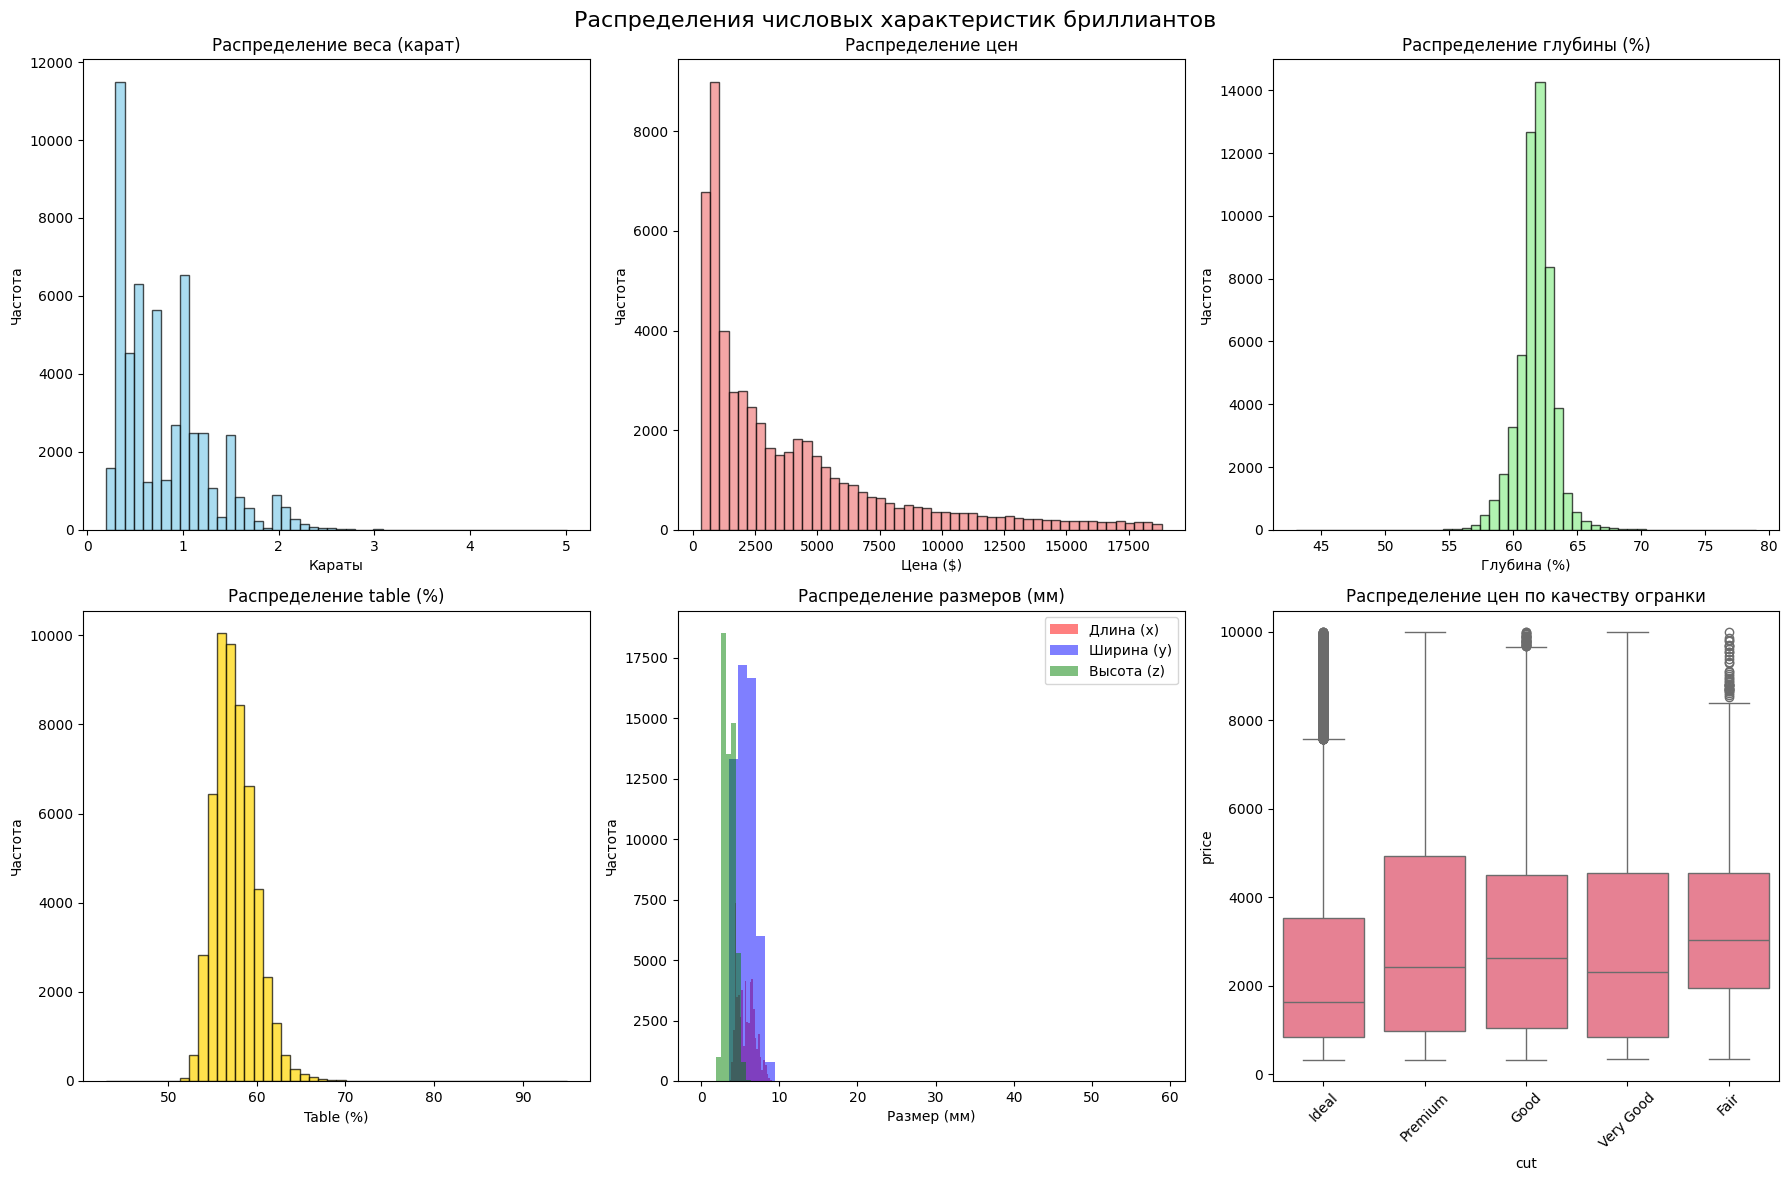


2. КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ


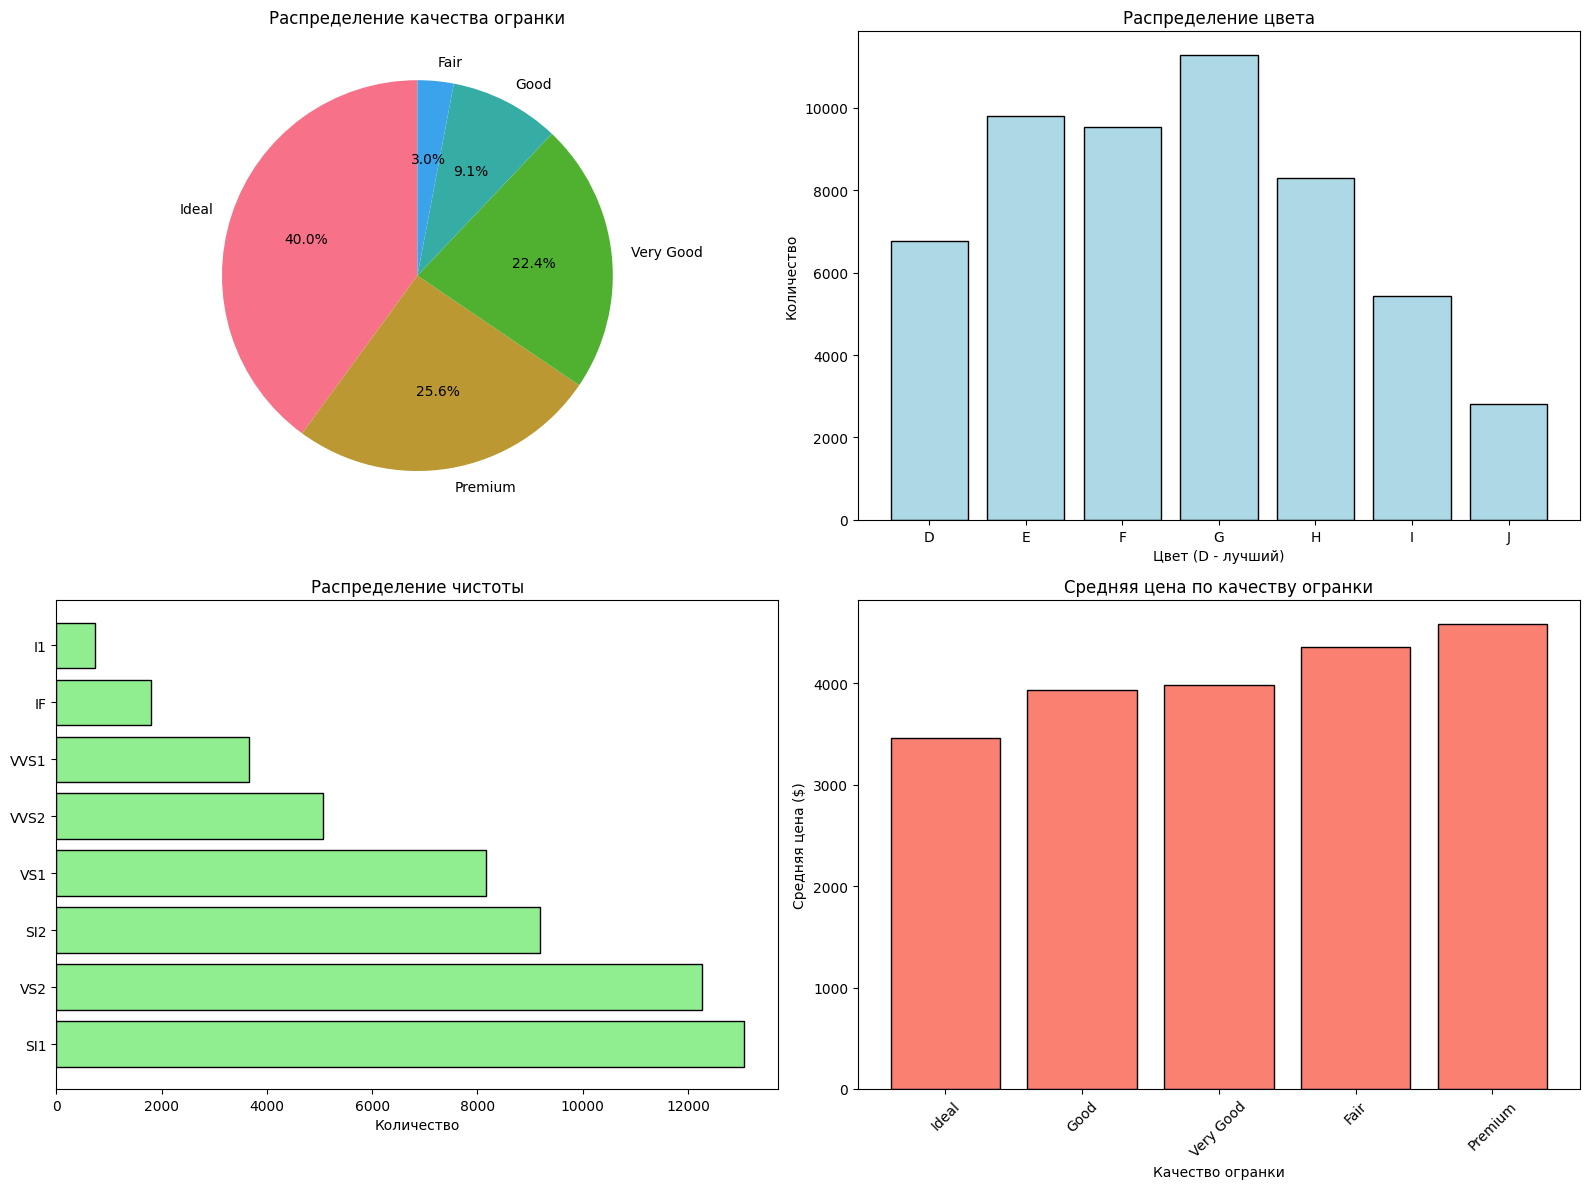


3. КОРРЕЛЯЦИИ И СВЯЗИ


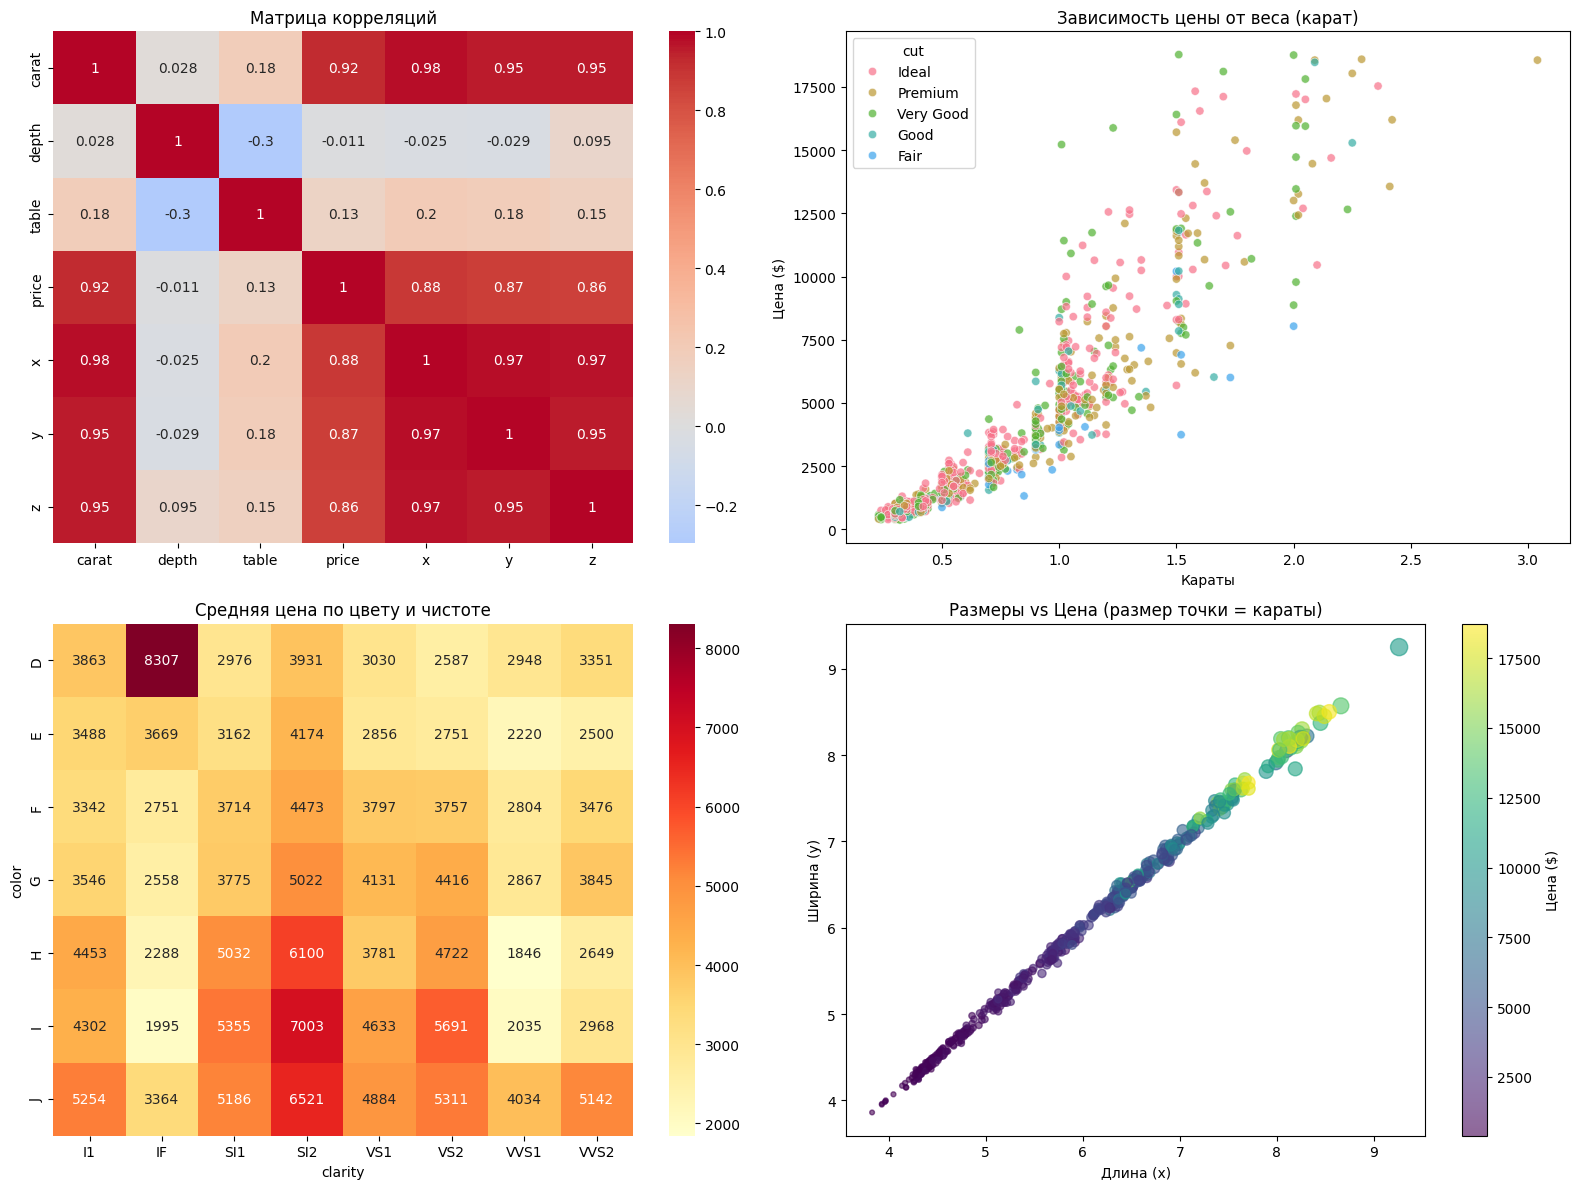


4. ДЕТАЛЬНЫЙ АНАЛИЗ


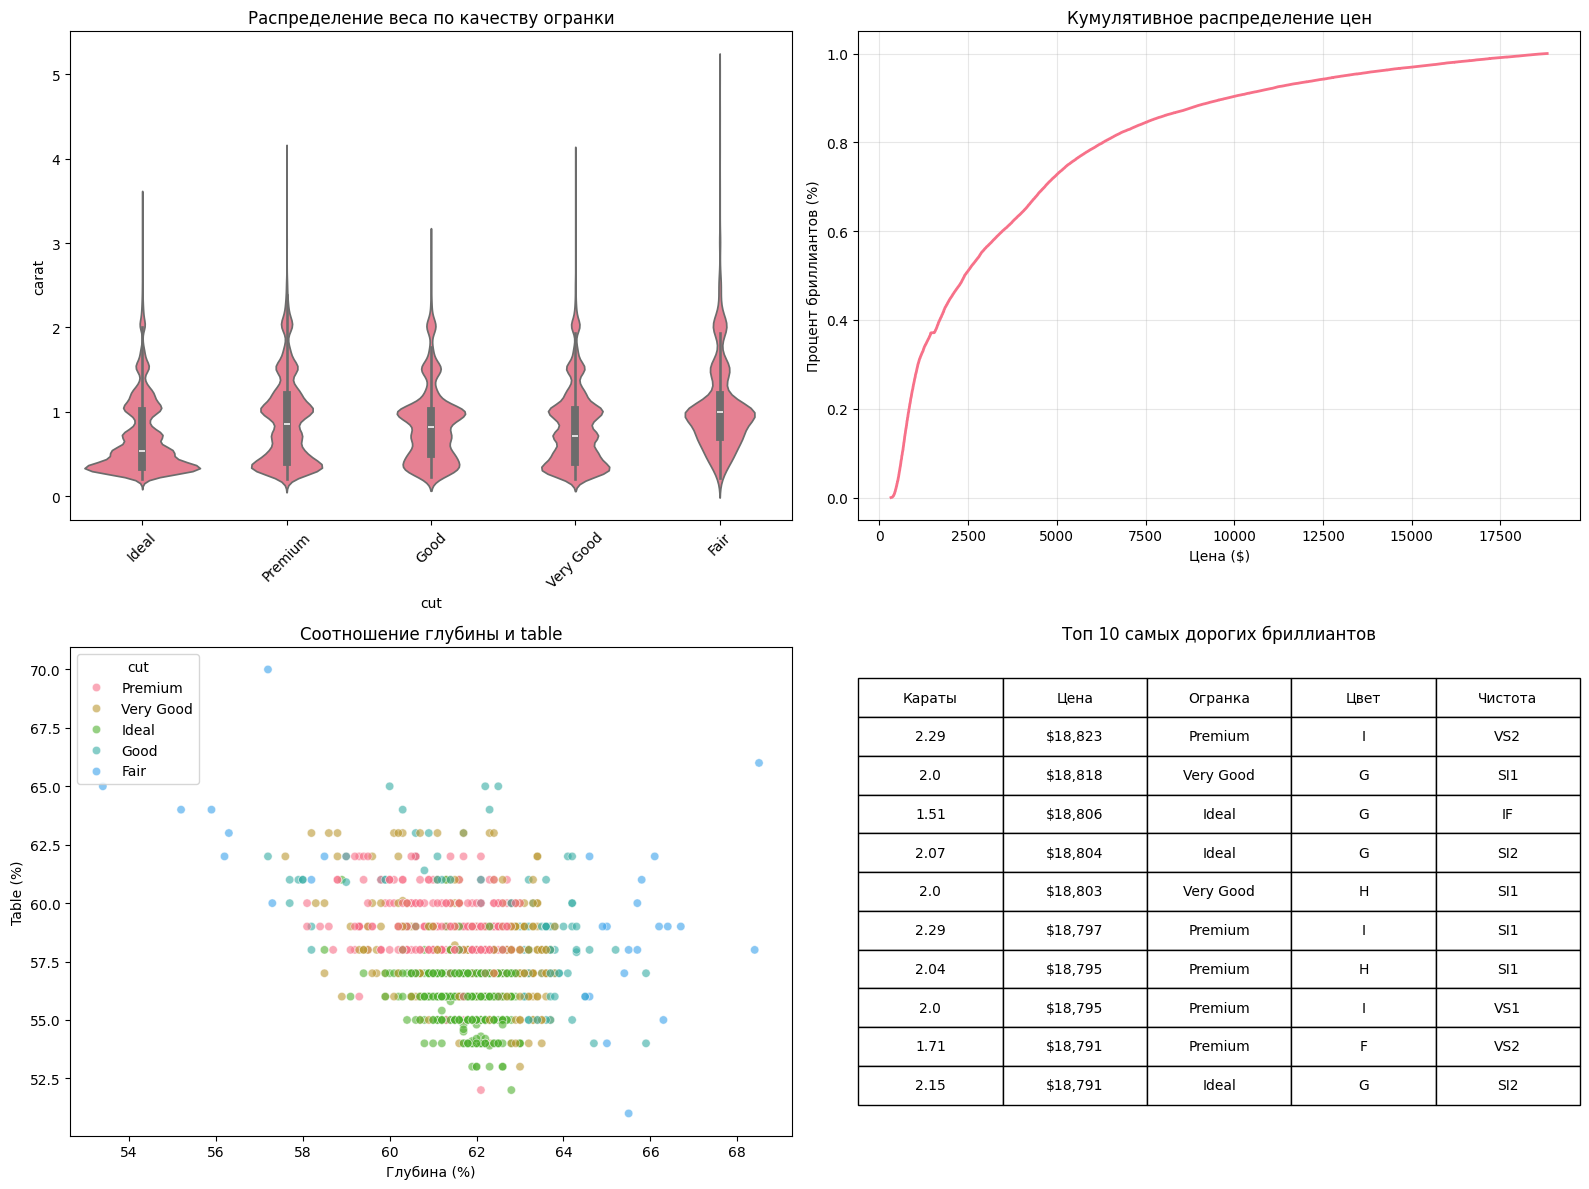


ОСНОВНАЯ СТАТИСТИКА:
Всего записей: 53,940
Средняя цена: $3932.80
Средний вес: 0.80 карат
Самый дорогой бриллиант: $18,823
Самый большой бриллиант: 5.01 карат

Самое частое качество огранки: Ideal
Самый частый цвет: G

ПРЕДОБРАБОТКА ДАННЫХ
Пропущенные значения:
Series([], dtype: int64)
Дубликатов до очистки: 146
Дубликатов после очистки: 0
Категориальные колонки: ['cut', 'color', 'clarity']
cut: 5 уникальных значений
color: 7 уникальных значений
clarity: 8 уникальных значений
Типы данных после оптимизации:
carat            float32
depth            float32
table            float32
x                float32
y                float32
z                float32
price              int16
cut_Fair            bool
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_D             bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_I1  

In [1]:

from Hw6.data_load import *
from Hw6.data_processing import processing
from Hw6.data_visual import create_visualisation

create_table_in_db()
describe_diamonds()
df = load_data_from_db()
create_visualisation(df)
df_proc = processing(df)


ПРЕДОБРАБОТКА ДАННЫХ
Пропущенные значения:
Series([], dtype: int64)
Дубликатов до очистки: 146
Дубликатов после очистки: 0
Категориальные колонки: ['cut', 'color', 'clarity']
cut: 5 уникальных значений
color: 7 уникальных значений
clarity: 8 уникальных значений
Типы данных после оптимизации:
carat            float32
depth            float32
table            float32
x                float32
y                float32
z                float32
price              int16
cut_Fair            bool
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_D             bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_I1          bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object

АНАЛИЗ И СЕГМЕНТ

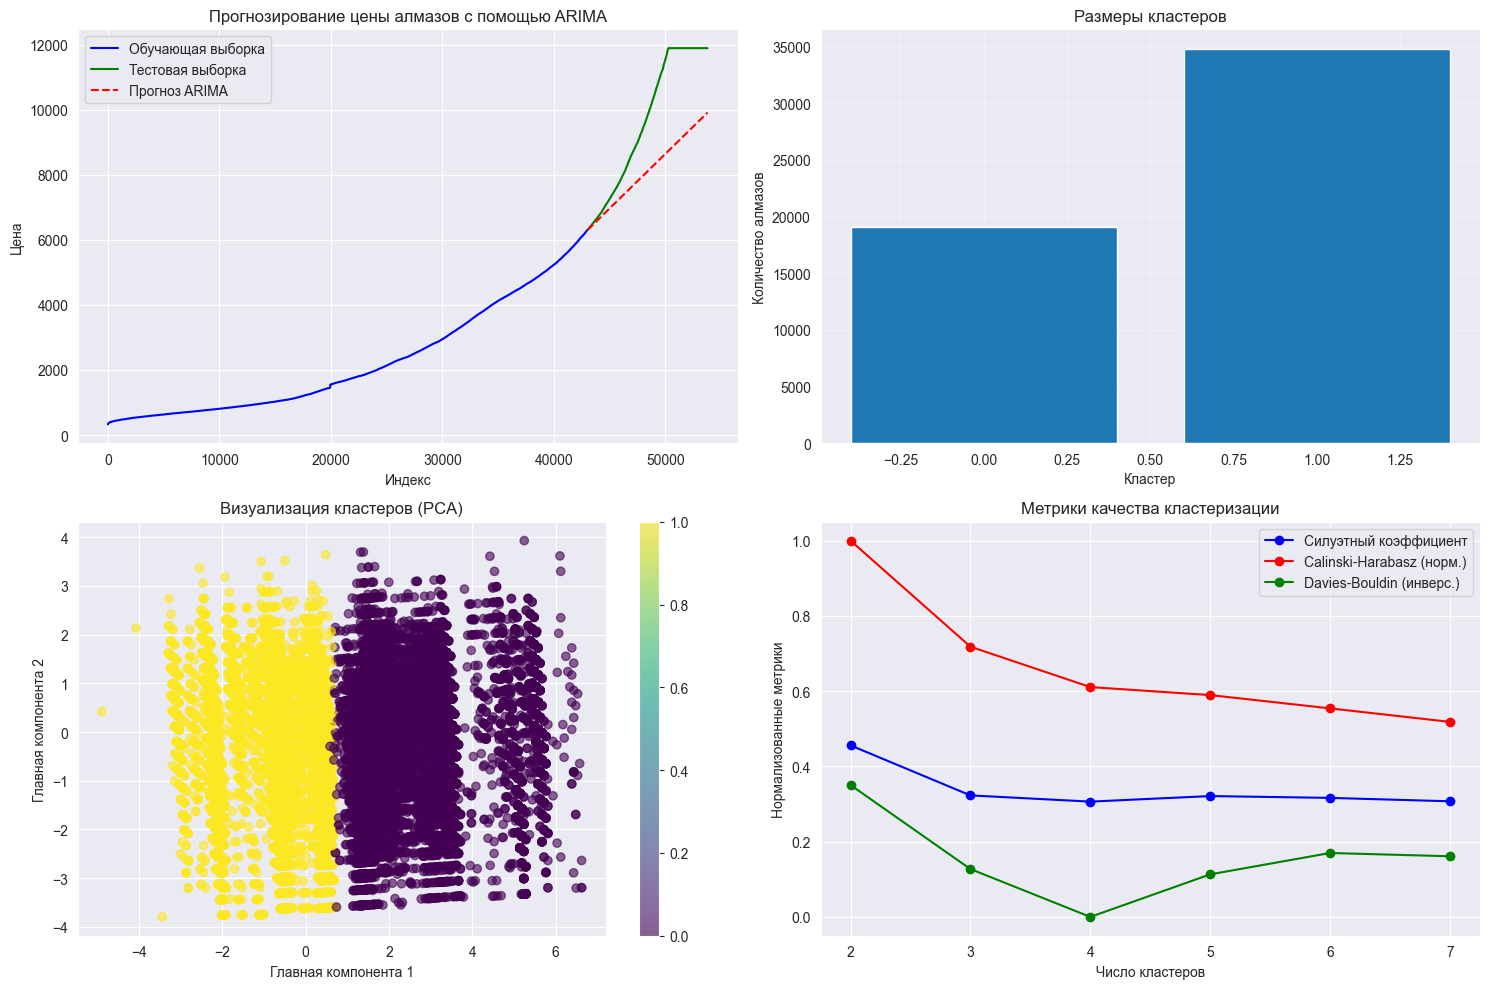


ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ

--- Кластер 0 (n=19034) ---
Средняя цена: $7572.76
Средний карат: 1.110
Средние размеры: x=6.48, y=6.47, z=3.89
Диапазон цен: $1681.00 - $11890.00

--- Кластер 1 (n=34760) ---
Средняя цена: $1630.30
Средний карат: 0.000
Средние размеры: x=4.58, y=4.58, z=2.53
Диапазон цен: $326.00 - $11890.00

ПРОГНОЗИРОВАНИЕ ДЛЯ КАЖДОГО КЛАСТЕРА

Кластер 0:  ARIMA(4,2,3)(0,0,0)[0]          
  MAE: $1854.70, RMSE: $2236.74, MAPE: 15.6%

Кластер 1:  ARIMA(5,2,0)(0,0,0)[0]          
  MAE: $314.42, RMSE: $384.15, MAPE: 8.9%


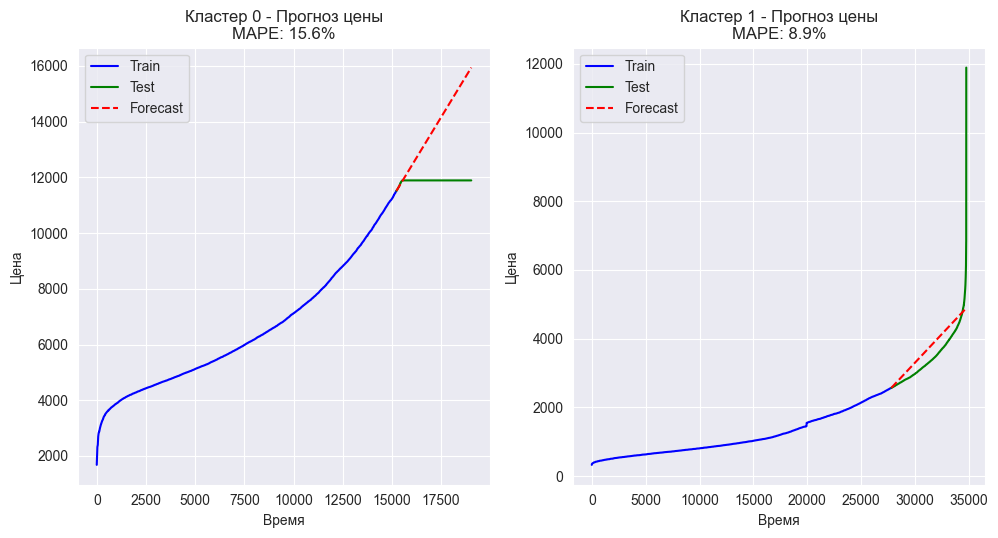


СВОДНАЯ ТАБЛИЦА МЕТРИК КАЧЕСТВА

МЕТРИКИ КЛАСТЕРИЗАЦИИ:
Метрика                   Значение        Интерпретация                 
----------------------------------------------------------------------
Силуэтный коэффициент     0.4559          Слабая структура              
Calinski-Harabasz         54060.31        Чем выше, тем лучше           
Davies-Bouldin            0.9083          Чем ниже, тем лучше           
Within-cluster SSE        187814.14       Чем ниже, тем лучше           

МЕТРИКИ ПРОГНОЗИРОВАНИЯ (Общая модель ARIMA):
Метрика         Значение       
------------------------------
MAE             1557.67        
MSE             3526586.43     
RMSE            1877.92        
MAPE            14.4           %
R2              0.1481         

МЕТРИКИ ПРОГНОЗИРОВАНИЯ ПО КЛАСТЕРАМ:
Кластер    Модель          MAE        RMSE       MAPE      
-------------------------------------------------------
0          ARIMA(4, 2, 3)  $1854.70   $2236.74   15.6     %
1          ARIMA(5, 2

In [2]:
import warnings
from Hw6.data_load import *
from Hw6.data_processing import processing
from Hw6.arima_functions import arima_start

warnings.filterwarnings('ignore')

df = load_data_from_db()
df_processed = processing(df.copy())

arima_start(df_processed)
'''
Разделение данных на кластеры было крайне важным и полезным шагом. Прогнозная модель, построенная на всех данных (общая модель), оказалась неудовлетворительной, в то время как модели, построенные для каждого кластера в отдельности, показали значительно лучшее качество, особенно для кластера 1.
ПРОГНОЗИРОВАНИЕ ПО КЛАСТЕРАМ
Кластер 0 (ARIMA(4, 2, 3)):
MAE ($1854.70), RMSE ($2236.74), MAPE (15.6%): Показатели хуже, чем у общей модели. Это означает, что для этого кластера модель прогнозирует менее точно. Разница между MAE и RMSE также указывает на наличие более крупных ошибок.
Кластер 1 (ARIMA(5, 2, 0)):
MAE ($314.42), RMSE ($384.15), MAPE (8.9%): Здесь модель работает гораздо точнее, чем в кластере 0 и в общей модели. Ошибки прогнозирования в этом кластере значительно ниже. Это говорит о том, что кластеризация позволила выделить группу объектов (например, более дешёвых или однородных алмазов), для которой прогноз работает гораздо лучше.
Существенная разница в метриках прогнозирования между кластерами подтверждает, что данные по ценам на алмазы неоднородны. Применение единой модели ко всему датасету неоптимально.
'''


Размер данных после предобработки: (53940, 10)
ЗАПУСК СЕГМЕНТАЦИИ АЛМАЗОВ


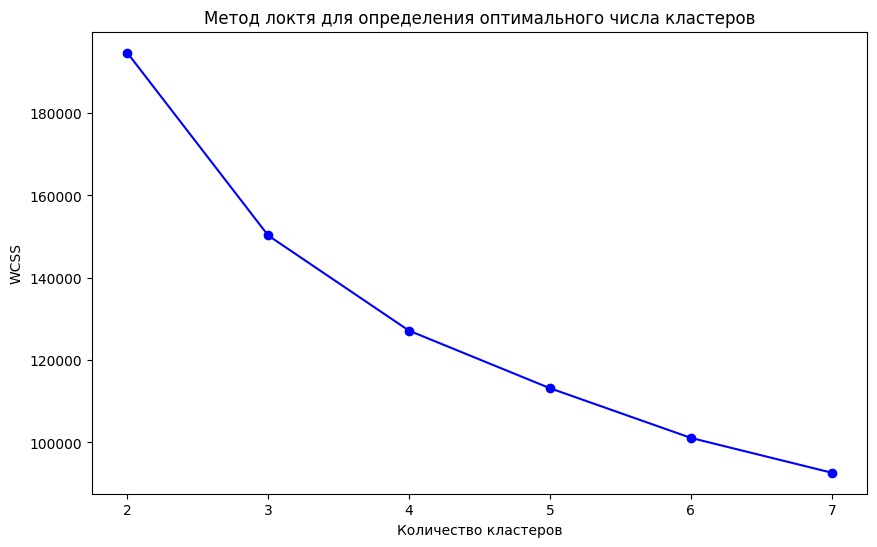


1. ТРАДИЦИОННАЯ КЛАСТЕРИЗАЦИЯ
Silhouette Score (традиционная): 0.367


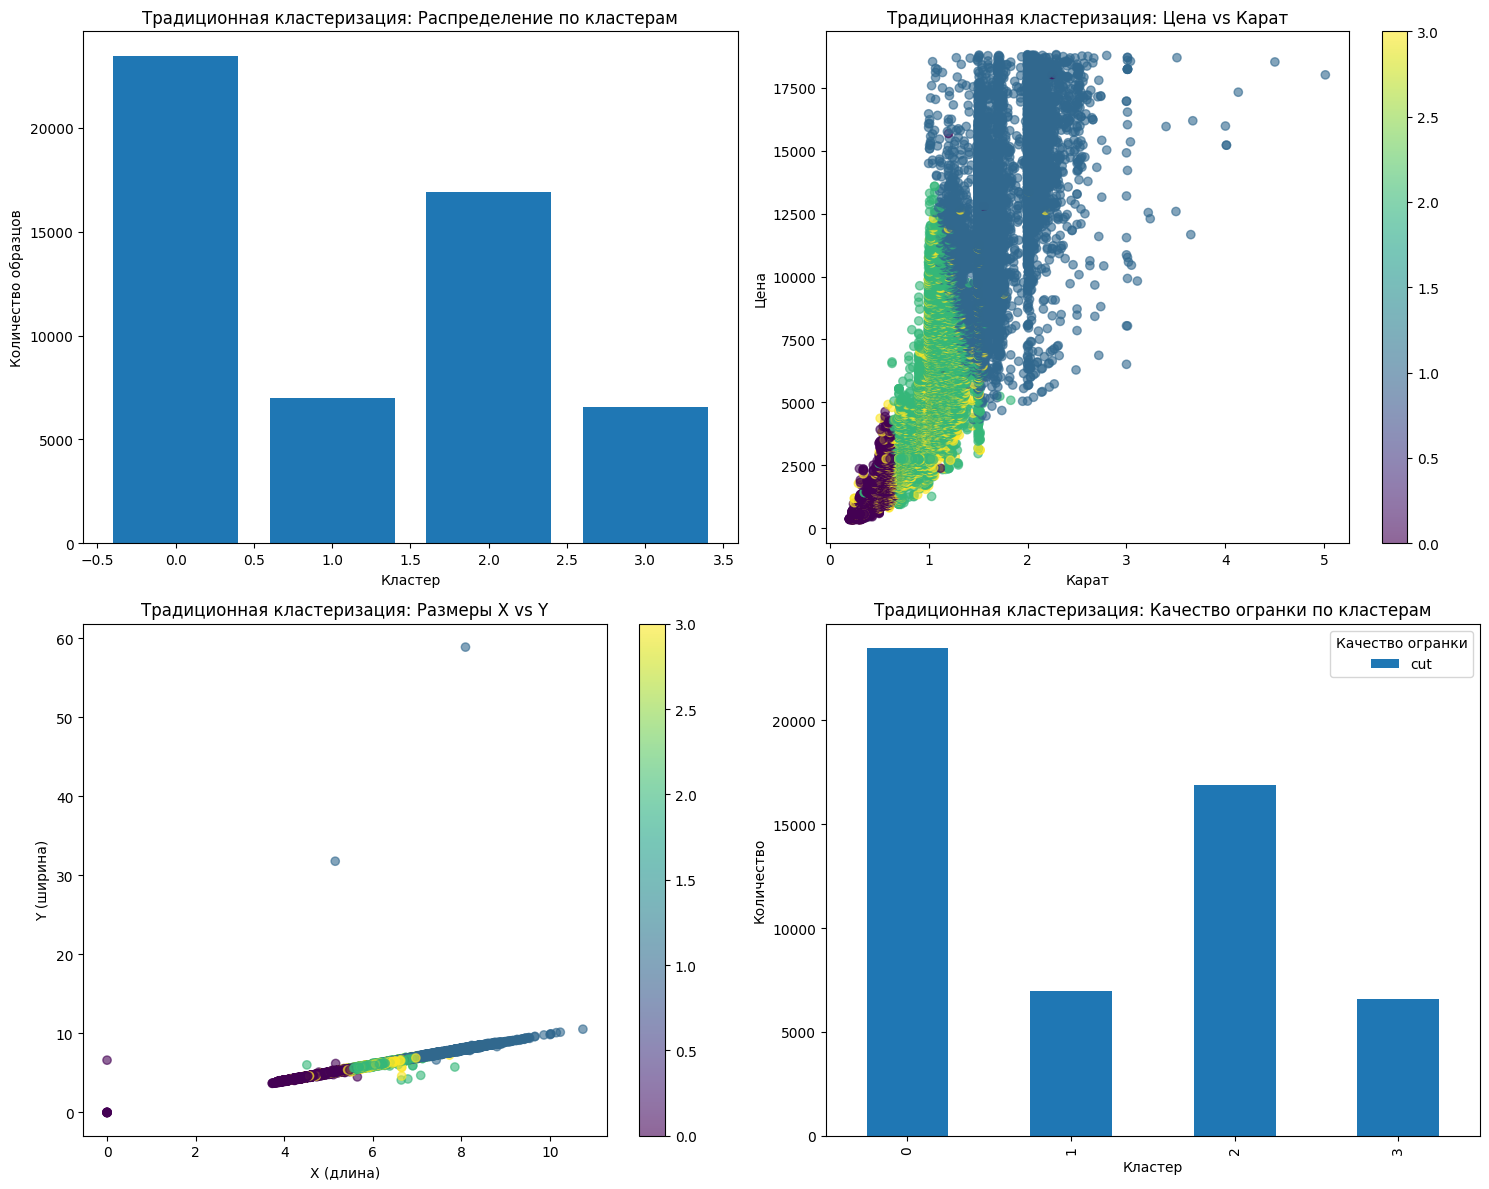


ТРАДИЦИОННАЯ КЛАСТЕРИЗАЦИЯ - АНАЛИЗ КЛАСТЕРОВ
Средние значения по кластерам:
            carat      depth      table         x         y         z  \
cluster                                                                 
0        0.396351  61.818097  56.721658  4.683770  4.693480  2.897320   
1        1.712047  61.721658  58.034970  7.637468  7.638056  4.712539   
2        0.966867  62.399343  57.075719  6.284644  6.284540  3.920268   
3        0.826089  59.862200  60.450548  6.021946  6.014557  3.600513   

                price  
cluster                
0         1040.458891  
1        12198.523905  
2         4708.951674  
3         3480.842714  

Размеры кластеров:
Кластер 0: 23474 образцов (43.5%)
Кластер 1: 6986 образцов (13.0%)
Кластер 2: 16906 образцов (31.3%)
Кластер 3: 6574 образцов (12.2%)

2. LSTM КЛАСТЕРИЗАЦИЯ
Размер последовательностей: (53938, 3, 7)
Обучение LSTM автоэнкодера...
Silhouette Score (LSTM): 0.247


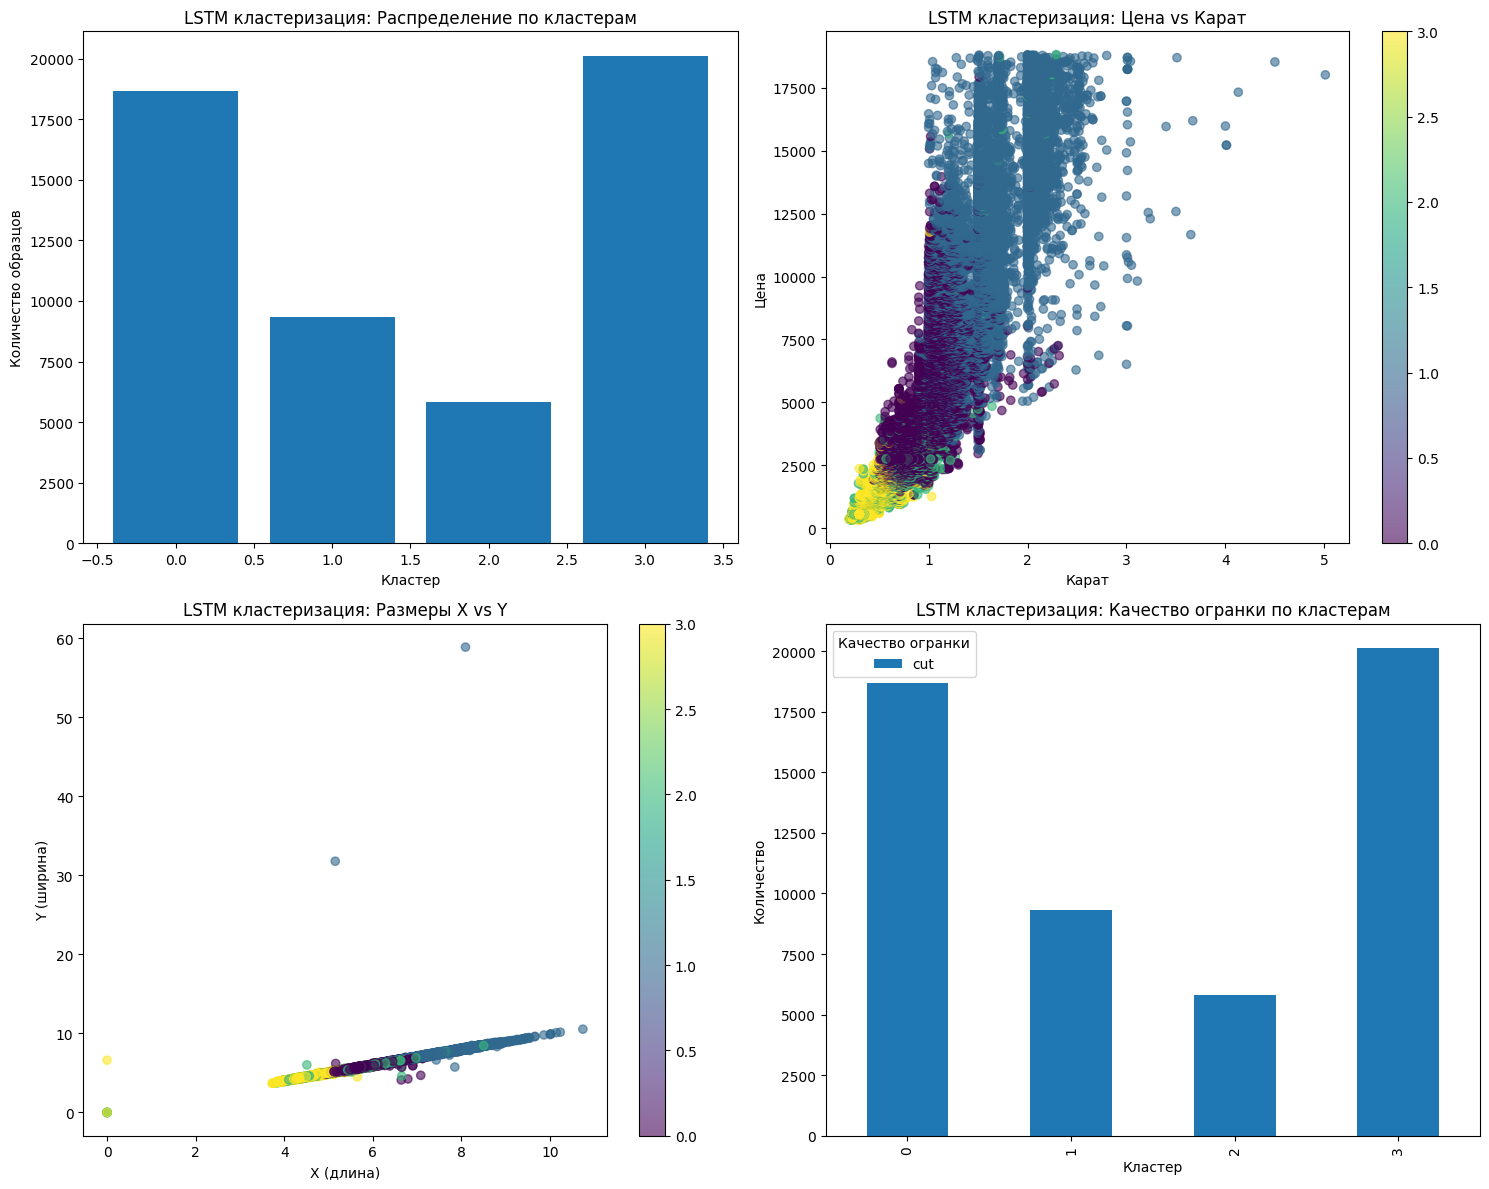


LSTM КЛАСТЕРИЗАЦИЯ - АНАЛИЗ КЛАСТЕРОВ
Средние значения по кластерам:
            carat      depth      table         x         y         z  \
cluster                                                                 
0        0.935107  62.215209  57.152729  6.212248  6.213374  3.865245   
1        1.552059  61.267534  58.530409  7.390887  7.389291  4.528204   
2        0.539244  60.133110  60.471574  5.171414  5.167898  3.103449   
3        0.395410  62.007271  56.371741  4.676132  4.685872  2.902244   

                price  
cluster                
0         4442.625234  
1        10628.927485  
2         1644.482955  
3         1013.356096  

Размеры кластеров:
Кластер 0: 18673 образцов (34.6%)
Кластер 1: 9336 образцов (17.3%)
Кластер 2: 5808 образцов (10.8%)
Кластер 3: 20121 образцов (37.3%)


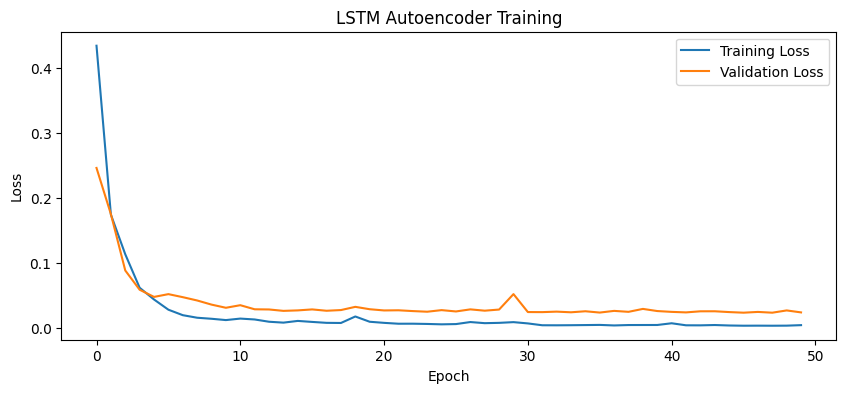


СРАВНЕНИЕ МЕТОДОВ
Традиционная кластеризация - Silhouette Score: 0.367
LSTM кластеризация - Silhouette Score: 0.247


In [2]:
from sklearn.metrics import silhouette_score
from Hw6.ltsm_functions import *
from Hw6.data_load import load_data_from_db
import warnings

warnings.filterwarnings('ignore')

# Загрузка данных
df = load_data_from_db()
# Предобработка данных
df_processed = df  #processing(df)
print(f"\nРазмер данных после предобработки: {df_processed.shape}")

# Основной процесс сегментации
print("ЗАПУСК СЕГМЕНТАЦИИ АЛМАЗОВ")
print("=" * 50)

# Определение оптимального числа кластеров
features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed[features])

# Метод локтя для определения числа кластеров
wcss = []
k_range = range(2, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.show()

# Выбор числа кластеров
n_clusters = 4

# 1. Традиционная кластеризация
print("\n1. ТРАДИЦИОННАЯ КЛАСТЕРИЗАЦИЯ")
traditional_clusters, _ = traditional_clustering(df_processed, n_clusters)

# Оценка качества
silhouette_avg = silhouette_score(scaled_data, traditional_clusters)
print(f"Silhouette Score (традиционная): {silhouette_avg:.3f}")

# Визуализация
plot_traditional_clustering_results(df_processed, traditional_clusters, "Традиционная кластеризация")

# Анализ традиционных кластеров
df_traditional_clustered = analyze_clusters(df_processed, traditional_clusters, "ТРАДИЦИОННАЯ КЛАСТЕРИЗАЦИЯ")

# 2. LSTM кластеризация
print("\n2. LSTM КЛАСТЕРИЗАЦИЯ")
sequence_length = 3  # Уменьшаем длину последовательности для большего количества данных

lstm_clusters, encoded_features, history, sequences = lstm_clustering(
    df_processed, n_clusters, sequence_length)

if lstm_clusters is not None:
    # Оценка качества для LSTM
    lstm_silhouette = silhouette_score(encoded_features, lstm_clusters)
    print(f"Silhouette Score (LSTM): {lstm_silhouette:.3f}")

    # Визуализация LSTM кластеризации
    df_lstm_vis = plot_lstm_clustering_results(
        df_processed, lstm_clusters, sequences, "LSTM кластеризация")

    # Анализ кластеров LSTM
    df_lstm_clustered = analyze_clusters(df_lstm_vis, lstm_clusters, "LSTM КЛАСТЕРИЗАЦИЯ")

    # Визуализация обучения автоэнкодера
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Autoencoder Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("LSTM кластеризация не выполнена из-за недостатка данных")

print("\n" + "=" * 50)
print("СРАВНЕНИЕ МЕТОДОВ")
print("=" * 50)
print(f"Традиционная кластеризация - Silhouette Score: {silhouette_avg:.3f}")
if lstm_clusters is not None:
    print(f"LSTM кластеризация - Silhouette Score: {lstm_silhouette:.3f}")

    '''
    Традиционная кластеризация
Кластер 0 (43.5% данных): Самая большая группа, включает мелкие и дешевые бриллианты (средний карат 0.396, средняя цена $1040).
Кластер 1 (13.0% данных): Группа самых крупных и дорогих бриллиантов (средний карат 1.712, средняя цена $12198).
Кластер 2 (31.3% данных): Средняя группа по каратам и цене (средний карат 0.967, средняя цена $4709), с относительно высокой глубиной огранки (depth).
Кластер 3 (12.2% данных): Группа дешевых бриллиантов среднего веса (средний карат 0.826, средняя цена $3481), но с менее оптимальными параметрами огранки (меньшая глубина depth, большая площадка table).
    LSTM кластеризация
Кластер 0 (34.6% данных): Бриллианты среднего размера и цены (средний карат 0.935, средняя цена $4443).
Кластер 1 (17.3% данных): Крупные и дорогие бриллианты (средний карат 1.552, средняя цена $10629), но менее дорогие, чем в традиционной кластеризации.
Кластер 2 (10.8% данных): Группа мелких и недорогих бриллиантов (средний карат 0.539, средняя цена $1644) с менее оптимальной огранкой (меньшая глубина depth, большая площадка table), что делает их похожими на кластер 3 традиционной кластеризации.
Кластер 3 (37.3% данных): Самая большая группа, включает самые мелкие и дешевые бриллианты (средний карат 0.395, средняя цена $1013).

Итоги:
   Традиционная кластеризация оказалась более эффективной для данных бриллиантов. Более высокий коэффициент силуэта указывает на лучшее качество разделения. Кластеры, сформированные традиционным методом, более однородны и легче поддаются интерпретации.
   LSTM кластеризация демонстрирует более равномерное распределение по кластерам, но за счет менее четкого разделения.
'''



ПРЕДОБРАБОТКА ДАННЫХ
Пропущенные значения:
Series([], dtype: int64)
Дубликатов до очистки: 146
Дубликатов после очистки: 0
Категориальные колонки: ['cut', 'color', 'clarity']
cut: 5 уникальных значений
color: 7 уникальных значений
clarity: 8 уникальных значений
Типы данных после оптимизации:
carat            float32
depth            float32
table            float32
x                float32
y                float32
z                float32
price              int16
cut_Fair            bool
cut_Good            bool
cut_Ideal           bool
cut_Premium         bool
cut_Very Good       bool
color_D             bool
color_E             bool
color_F             bool
color_G             bool
color_H             bool
color_I             bool
color_J             bool
clarity_I1          bool
clarity_IF          bool
clarity_SI1         bool
clarity_SI2         bool
clarity_VS1         bool
clarity_VS2         bool
clarity_VVS1        bool
clarity_VVS2        bool
dtype: object

Метрики качества

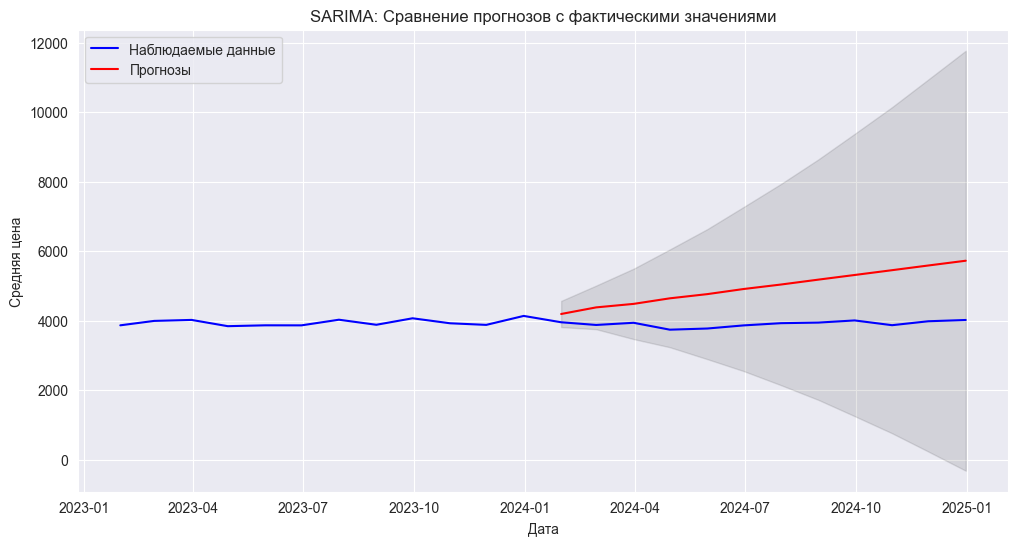

In [6]:
from Hw6.data_load import *
from Hw6.data_processing import processing
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = load_data_from_db()
df_proc = processing(df)
# 1. Генерация фиктивной временной метки
# Генерация фиктивной временной метки
n_records = len(df)
dates = pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 730, n_records), unit='D')
df['date'] = dates
df.set_index('date', inplace=True)
monthly_data = df['price'].resample('ME').mean().ffill()

# Разделение данных
train_size = len(monthly_data) - 12
train_data, test_data = monthly_data[:train_size], monthly_data[train_size:]

# Обучение модели
model_auto = auto_arima(
    train_data,
    start_p=1, start_q=1,
    test='adf',
    max_p=3, max_q=3,
    m=12,
    start_P=0, seasonal=True,
    d=None, D=0,
    trace=False,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

sarima_model = sm.tsa.statespace.SARIMAX(
    train_data,
    order=model_auto.order,
    seasonal_order=model_auto.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = sarima_model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=len(test_data))
predictions = forecast.predicted_mean
forecast_ci = forecast.conf_int()

if test_data.isnull().sum().any():
    test_data = test_data.ffill()

# Вычисление метрик качества
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

print("\nМетрики качества прогноза SARIMAX:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
# Визуализация фактических значений и прогнозов на тестовой выборке
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_data.index, monthly_data, label='Наблюдаемые данные', color='b')
ax.plot(predictions.index, predictions, label='Прогнозы', color='r')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.1)

plt.title('SARIMA: Сравнение прогнозов с фактическими значениями')
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.legend()
plt.show()

'''
Набор данных Kaggle resulcaliskan/diamonds представляет собой кросс-секционные данные, а не временной ряд. Это означает, что для него нельзя напрямую применить модель SARIMA, которая предназначена для прогнозирования временных рядов с сезонностью. Данные не имеют временной компоненты для каждой записи, и каждая точка данных независима.
Тем не менее, для демонстрации того, как реализовать SARIMA, можно создать агрегированный временной ряд из существующих данных.
Анализ основан на сгенерированных данных, где ежемесячная средняя цена бриллиантов создана искусственно.

Ошибка vs. Средняя цена: Ошибка в ~$1100 при средней цене в ~$3900 — это много. Это означает, что если модель предскажет цену в $4000, реальная цена может составить как $2900, так и $5100. Такой разброс делает модель малопригодной для точного ценообразования.

Ошибка vs. Простое предсказание: Что если бы мы просто всегда предсказывали среднюю цену ($3932)? Ошибка такой "тупой" модели (ее RMSE) была бы примерно равна стандартному отклонению, то есть ~$3989. Ваша модель (RMSE = $1152) значительно лучше этого наивного прогноза. Это главный положительный вывод — модель все же нашла в данных полезные закономерности.

Итоговая оценка:

С одной стороны: Модель SARIMAX явно работает лучше, чем простое предсказание среднего значения. Она извлекла из временного ряда (или из экзогенных переменных, если вы их использовали) какую-то полезную информацию.

С другой стороны: Абсолютная величина ошибки слишком высока для практического применения. Прогноз с погрешностью в 25-30% от стоимости товара не является надежным.
'''

Epoch 1/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13009971.0000 - val_loss: 4190215.0000
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1393776.6250 - val_loss: 833484.8750
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 786655.6250 - val_loss: 674819.8750
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 687697.8125 - val_loss: 622052.2500
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 636607.1875 - val_loss: 583350.5000
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 596046.8750 - val_loss: 552132.3125
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 571437.3750 - val_loss: 513167.0312
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 540218.1250 - val_loss: 497340.9688
Epoch 9/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 517204.4375 - val_loss: 493455.5938
Epoch 10/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 495143.5000 - val_loss: 457545.6875
Epoch 11/50
107

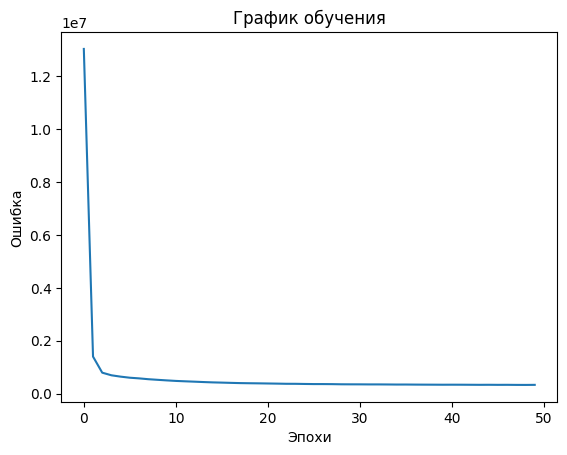

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from Hw6.data_load import *
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Input

df = load_data_from_db()

# Обрабатываем категориальные признаки с помощью One-Hot Encoding
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Определяем целевую переменную (y) и признаки (X)
X = df.drop('price', axis=1)
y = df['price']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем числовые признаки для лучшей сходимости
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Создание модели глубокой нейронной сети (DNN) для регрессии
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Явное указание входного слоя
    Dense(128, activation='relu'),            # Теперь input_shape не нужен
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Выходной слой для регрессии
])

# Компилируем модель, используя оптимизатор Adam и среднеквадратичную ошибку (MSE)
model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Обучение и оценка модели
# Обучаем модель на тренировочных данных
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Выводим прогноз для нескольких тестовых примеров
y_pred = model.predict(X_test_scaled)

# Оценка точности прогноза с использованием метрик регрессии
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Оценка точности прогноза ---")
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R^2): {r2:.4f}')

# Вывод прогноза для нескольких тестовых примеров
predictions = model.predict(X_test_scaled[:5])
print("\nПрогноз цены для первых 5 бриллиантов:")
print("Предсказанные цены:", np.round(predictions.flatten(), 2))
print("Фактические цены:", y_test[:5].values)

# Визуализация обучения
plt.plot(history.history['loss'])
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

'''
Анализ графика обучения
    График показывает, что ошибка модели резко снижается на начальных этапах обучения (первые 5-10 эпох), а затем стабилизируется. Это означает, что модель успешно обучается и сходится к оптимальному решению. Достигнув примерно 20-й эпохи, дальнейшее обучение не приводит к существенному уменьшению ошибки, что указывает на то, что модель, вероятно, уже изучила основные закономерности в данных.
Анализ метрик точности прогноза
    Среднеквадратичная ошибка (MSE): 315388.41
       Это значение показывает среднюю квадратичную разницу между предсказанными и фактическими ценами. Это число само по себе сложно интерпретировать, но оно используется для вычисления других, более понятных метрик.
    Корень из среднеквадратичной ошибки (RMSE): 561.59
       RMSE показывает среднюю ошибку прогноза в тех же единицах, что и целевая переменная (цена). Это означает, что в среднем прогноз модели отличается от фактической цены примерно на 561.59 единиц валюты.
    Коэффициент детерминации (R²): 0.9802
       Значение \(R^{2}\), равное 0.9802, является очень высоким и близким к 1. Это говорит о том, что примерно 98% дисперсии в ценах на бриллианты объясняется признаками, которые были использованы для обучения модели. Это отличный результат для задачи регрессии
Анализ прогнозов и фактических цен
    На примере первых пяти бриллиантов видно, что предсказанные цены достаточно близки к фактическим, хотя и не идеальны.
    Например: Для первого бриллианта прогноз составил 675.49 при фактической цене 559. Разница составляет около 116.
              Для второго бриллианта прогноз 2360.83 при фактической цене 2201. Разница — около 160.
              Для пятого бриллианта прогноз 9688.68 при фактической цене 6901. Разница — около 2787.
    Xотя для некоторых экземпляров ошибка может быть значительной, в целом, метрики (особенно \(R^{2}\)) показывают, что модель демонстрирует высокую производительность и делает хорошие прогнозы.
'''